# About Dataset <br>
This dataset encompasses extensive information on crop production in India, spanning multiple years and offering insights into agricultural trends and patterns. The dataset consists of over 246,000 records, capturing a wide array of variables related to crop production, and is intended to facilitate advanced analyses such as predictive modeling and the extraction of key insights for stakeholders in the agri-food sector.

### Temporal Coverage:<br>

The dataset covers multiple years, providing a longitudinal view of crop production trends in India. This temporal dimension is crucial for analyzing changes over time and understanding long-term patterns.<br>

### Geographical Scope:<br>

Data is collected across various states and regions of India, reflecting the diverse agricultural landscape of the country. Regional variations in crop production can be analyzed to identify local factors affecting yields.<br>


### Crop Types:<br>

The dataset includes information on various crop types grown across different regions. This classification allows for detailed analysis of specific crops, their production levels, and their sensitivity to various factors.<br>


### Production Metrics:<br>

Metrics related to crop production such as yield (e.g., tons per hectare), total production volume, and harvested area are included. These metrics are essential for evaluating productivity and efficiency.<br>

### Data Quality and Completeness:<br>

The dataset is likely to include a mix of structured and unstructured data. Data quality may vary, and preprocessing steps such as cleaning and normalization may be necessary to ensure accurate analyses.<br>


### Applications and Objectives:<br>

#### Predictive Modeling:<br>

The primary goal of analyzing this dataset is to develop predictive models for crop production. By leveraging historical data, machine learning algorithms can forecast future production levels and identify potential risks.<br>


#### Insight Extraction:<br>

The dataset provides an opportunity to uncover key indicators and metrics that significantly influence crop production. Insights can help stakeholders make informed decisions regarding crop management, resource allocation, and policy formulation.<br>


#### Trend Analysis:<br>

Longitudinal analysis of the data can reveal trends and patterns in crop production, helping to understand how factors such as technological advancements, policy changes, and environmental conditions affect agriculture.<br>


#### Stakeholder Collaboration:<br>

The dataset supports the development of collaboration platforms that connect various stakeholders in the agri-food sector. By integrating data from multiple sources, stakeholders can collaborate more effectively to address challenges and optimize production.<br>


#### Key Features:<br>

1. **State_Name**: Represents the name of the state in India where the crop data was recorded.<br>
2. **District_Name**: Specifies the district within the state where the crop data was collected.<br>
3. **Crop_Year**: Indicates the year in which the crop was harvested.<br>
4. **Season**: Denotes the agricultural season (e.g., Kharif, Rabi) during which the crop was grown.<br>
5. **Crop**: Identifies the type of crop that was cultivated.<br>
6. **Area**: Represents the total land area used for cultivating the crop.<br>
7. **Production**: Indicates the total quantity of the crop produced from the specified area.<br>

# Import Necessary Libraies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

import warnings 

warnings.filterwarnings("ignore")

# Load our Data

In [2]:
df = pd.read_csv("data/Crop Production data.csv")

In [3]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Kharif,Arecanut,1254.0,2000.0
1,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Kharif,Rice,102.0,321.0
3,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Whole Year,Banana,176.0,641.0
4,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Whole Year,Cashewnut,720.0,165.0


# Check of Data

In [4]:
print("Number of Columns:", df.shape[1])
print("Number of Rows:", df.shape[0])

Number of Columns: 7
Number of Rows: 246091


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [6]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [7]:
print("Number of Duplicates: ", df.duplicated().sum())

Number of Duplicates:  0


# EDA

In [8]:
des = df.describe().transpose()
des.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Crop_Year,246091.000000,2005.643018,4.952164,1997.000000,2002.000000,2006.000000,2010.000000,2015.000000
Area,246091.000000,12002.820864,50523.404019,0.040000,80.000000,582.000000,4392.000000,8580100.000000
Production,242361.000000,582503.442251,17065813.172410,0.000000,88.000000,729.000000,7023.000000,1250800000.000000


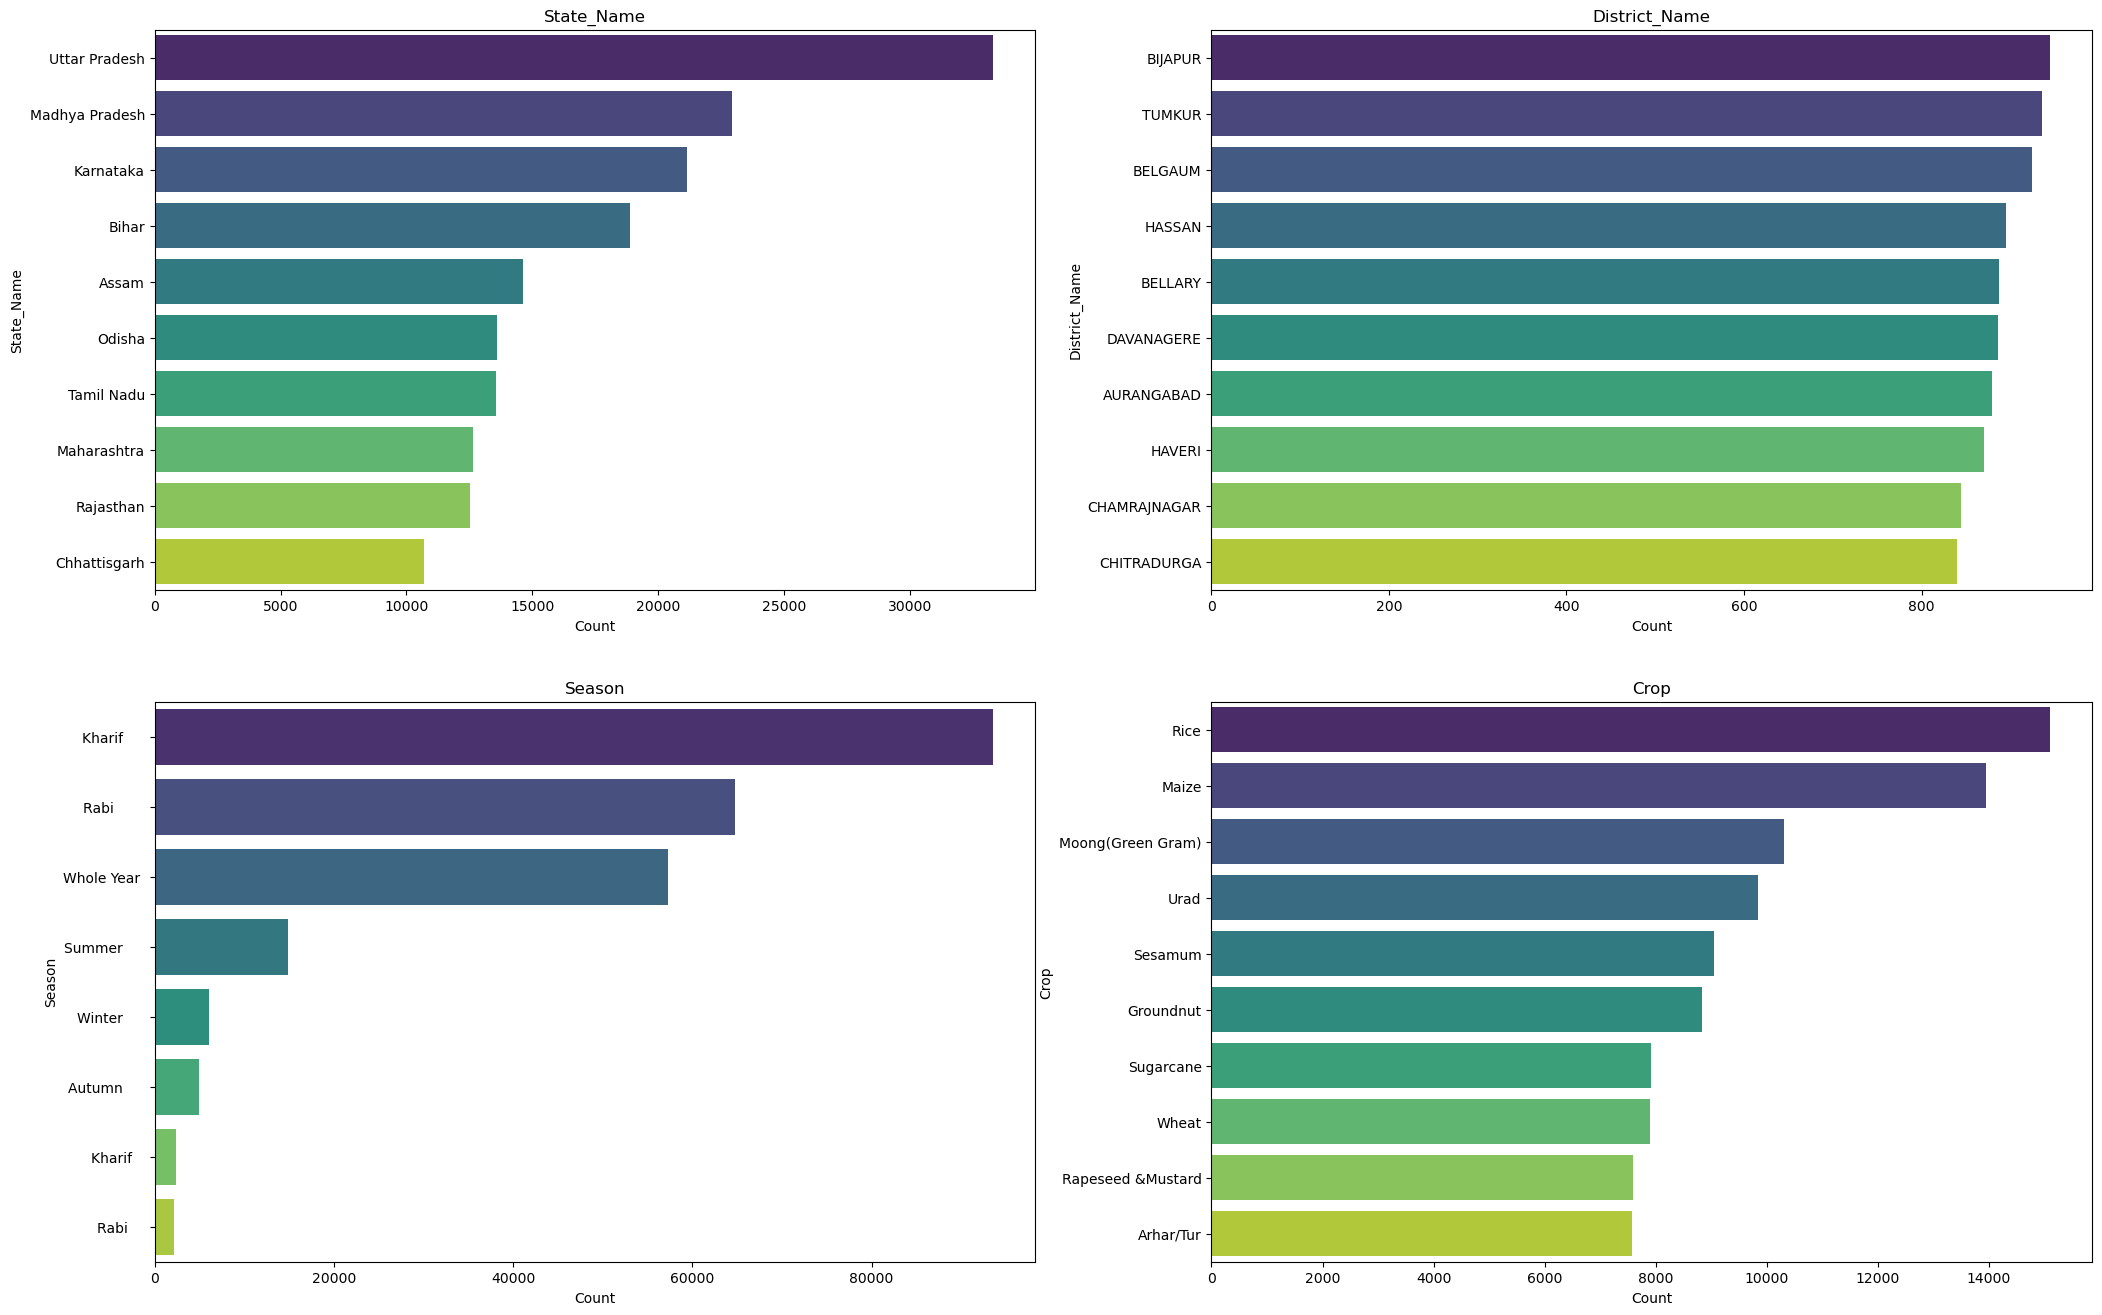

In [9]:
plt.figure(figsize=(25, 16))
for i, feature in enumerate(df.select_dtypes(include="object").columns):
    counts = df[feature].value_counts().head(10)
    plt.subplot(2, 2, i+1)
    sns.barplot(x=counts.values, y=counts.index, palette='viridis')
    plt.title(f"{feature}")
    plt.ylabel(f"{feature}")
    plt.xlabel("Count")
plt.show()

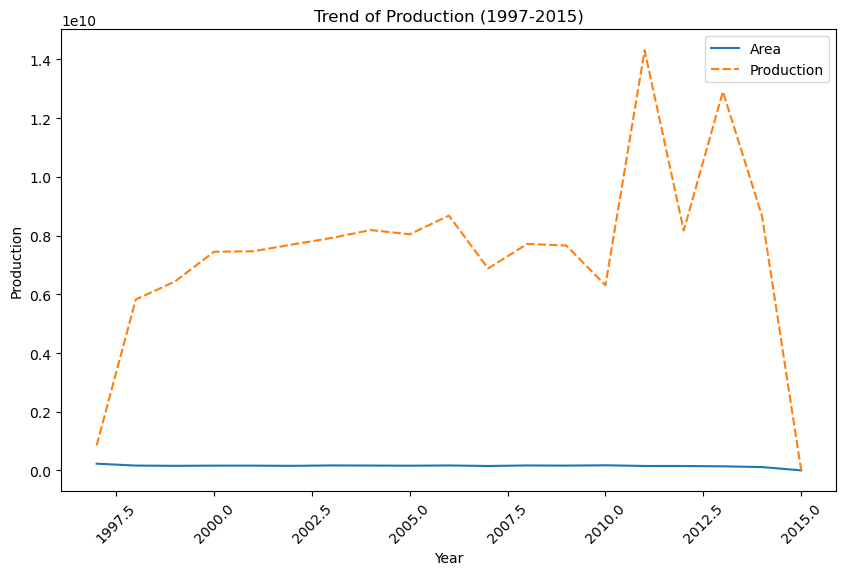

In [10]:
group_by_year = df.groupby("Crop_Year").sum()

plt.figure(figsize=(10, 6))
sns.lineplot(data=group_by_year)
plt.title('Trend of Production (1997-2015)')
plt.xlabel('Year')
plt.ylabel('Production')
plt.xticks(rotation=45)
plt.show()

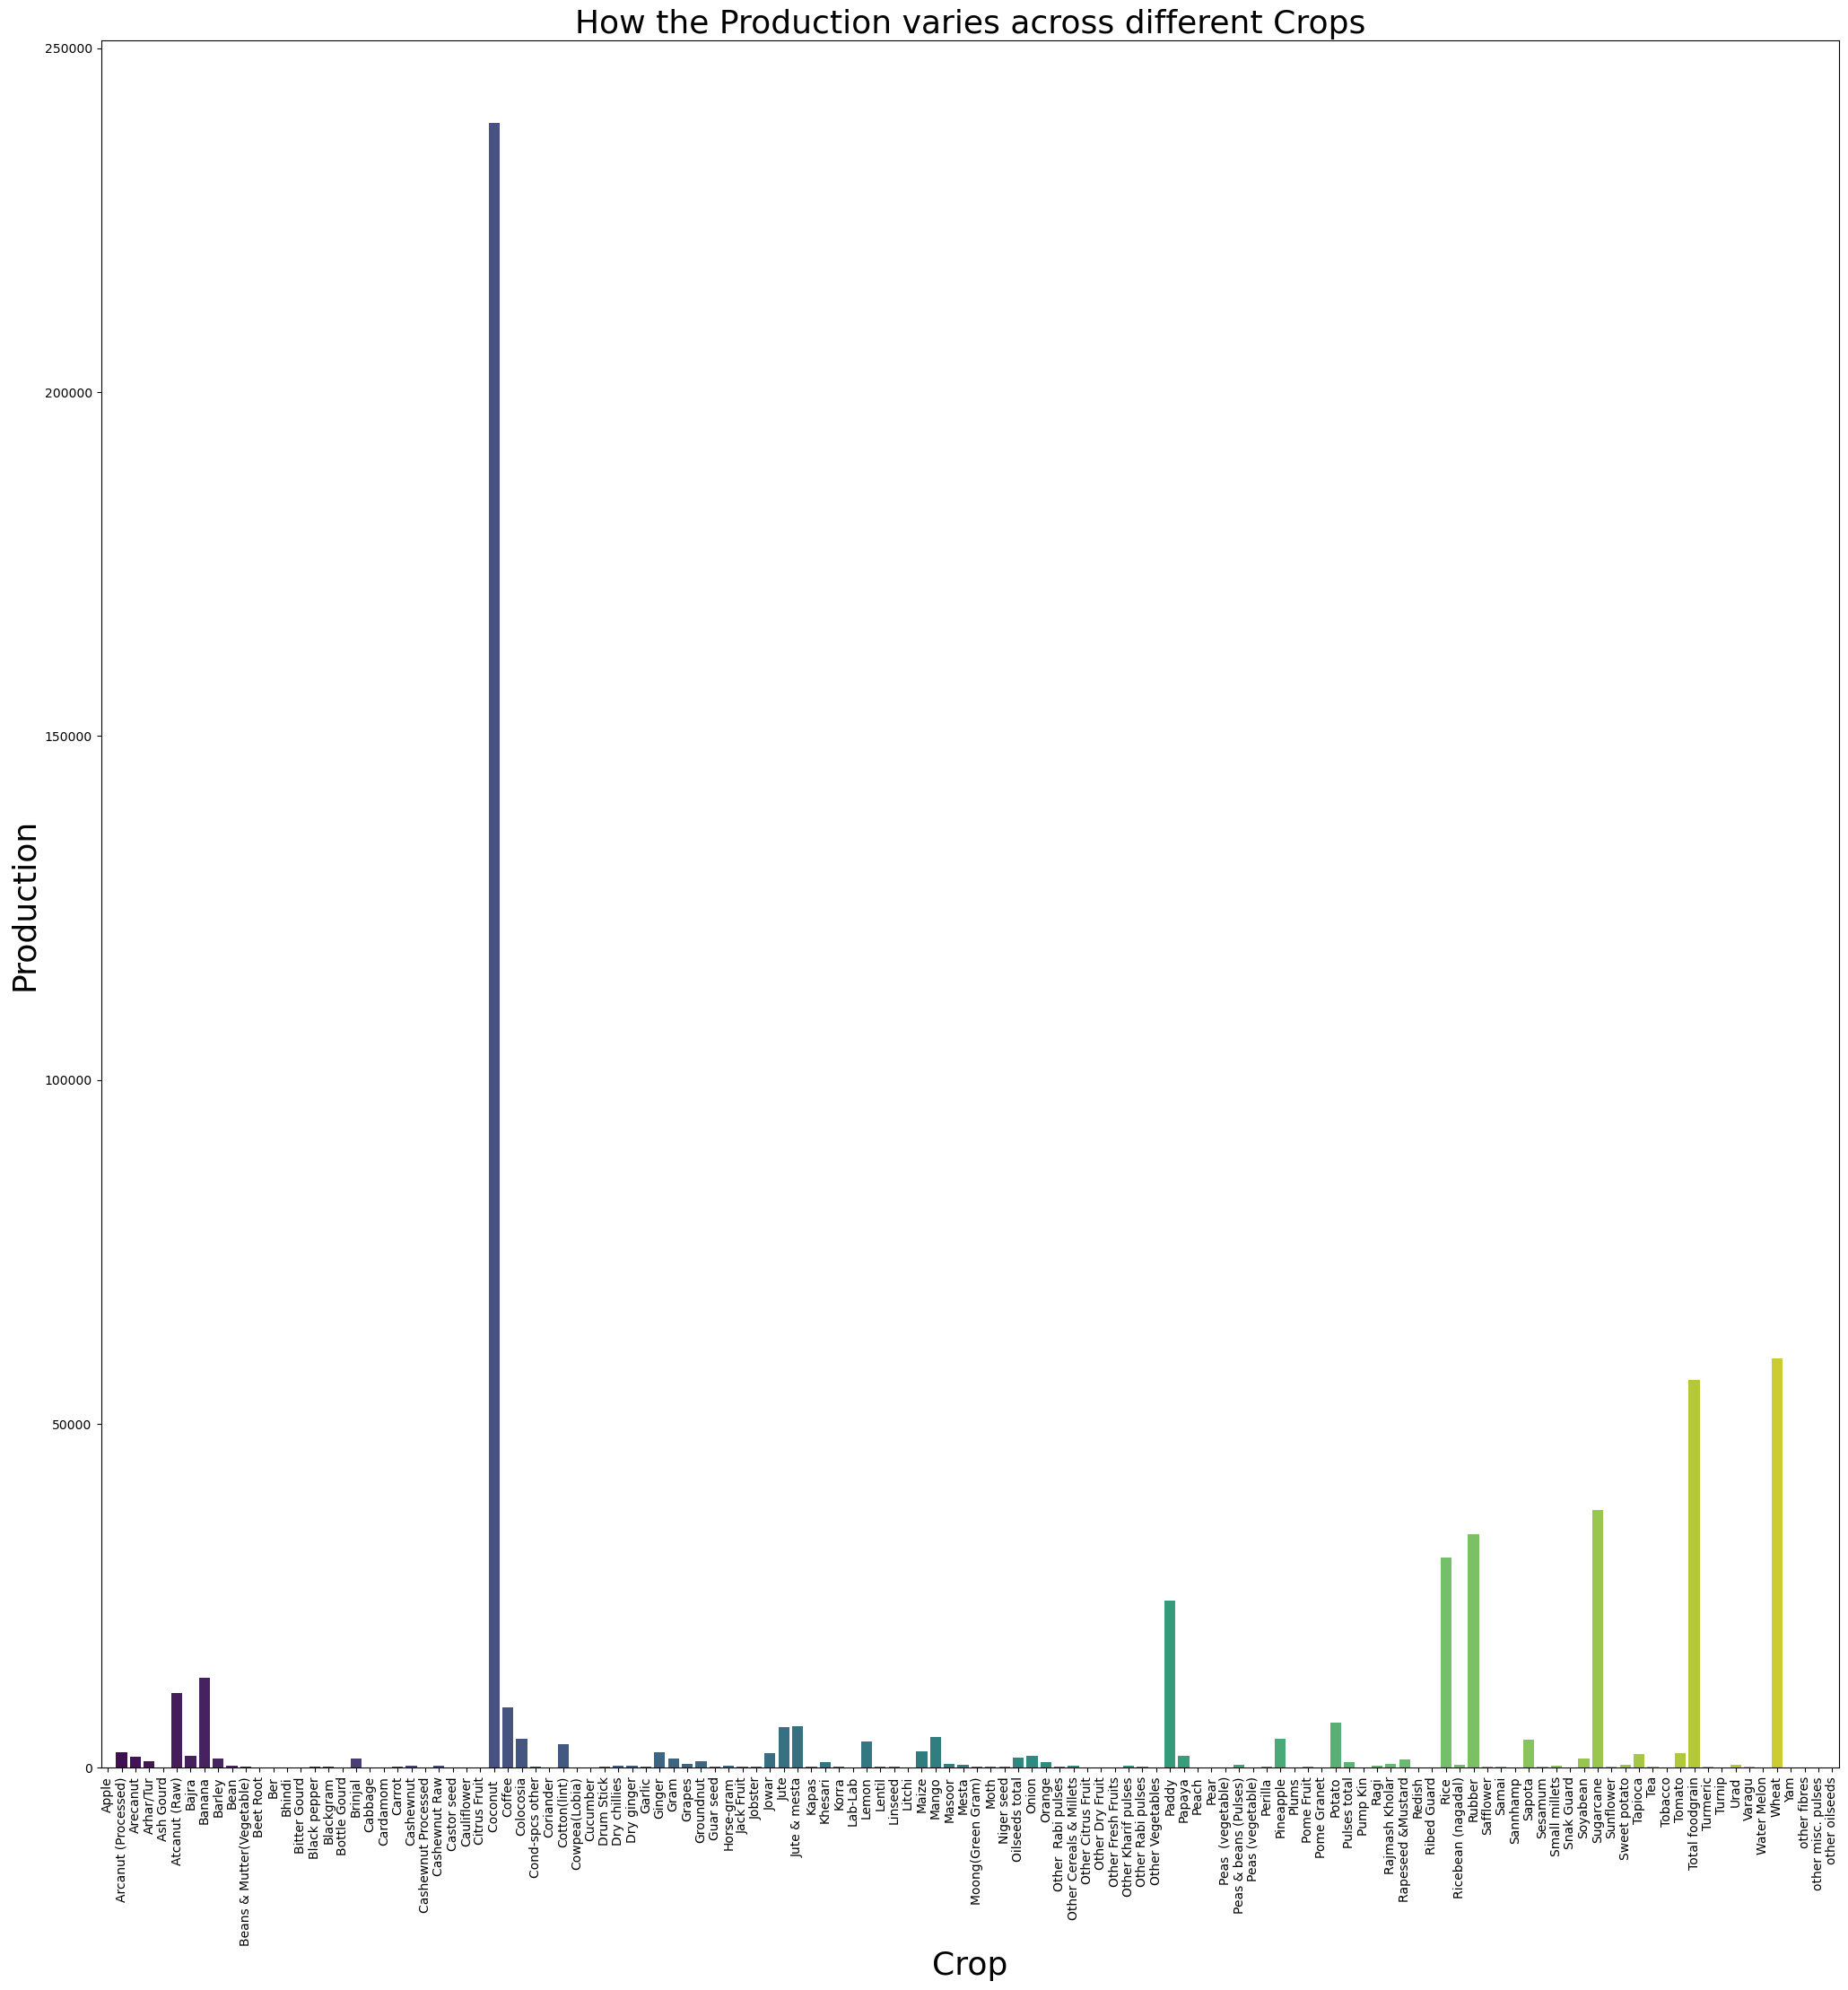

In [11]:
group_by_crop = df.groupby("Crop")["Production"].median().reset_index()

plt.figure(figsize=(25, 25))
sns.barplot(x=group_by_crop["Crop"], y=group_by_crop["Production"], palette='viridis')
plt.title("How the Production varies across different Crops", fontsize=26)
plt.xlabel("Crop", fontsize=26)
plt.ylabel("Production", fontsize=26)
plt.xticks(rotation=90) 
plt.show()

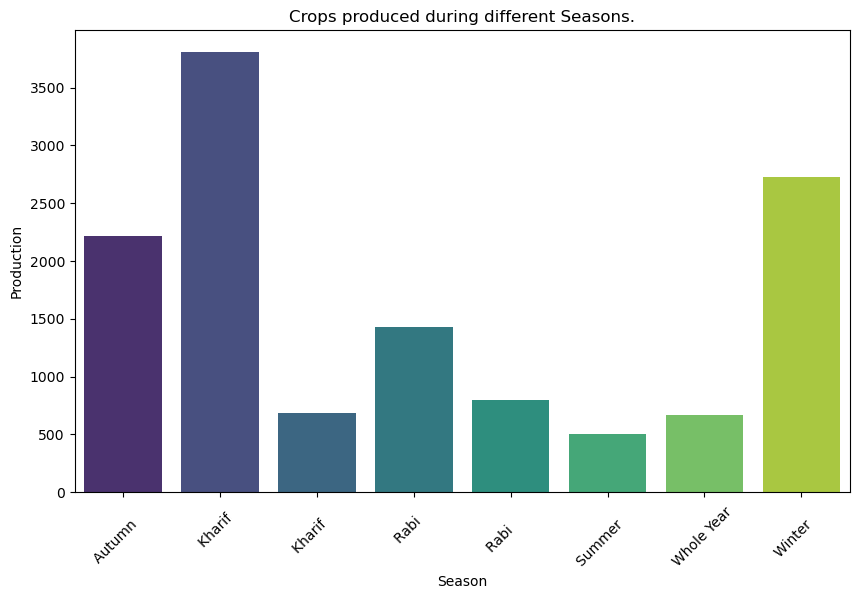

In [12]:
group_by_crop = df.groupby("Season")["Production"].median().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=group_by_crop["Season"], y=group_by_crop["Production"], palette='viridis')
plt.title("Crops produced during different Seasons.")
plt.xlabel("Season")
plt.ylabel("Production")
plt.xticks(rotation=45) 
plt.show()

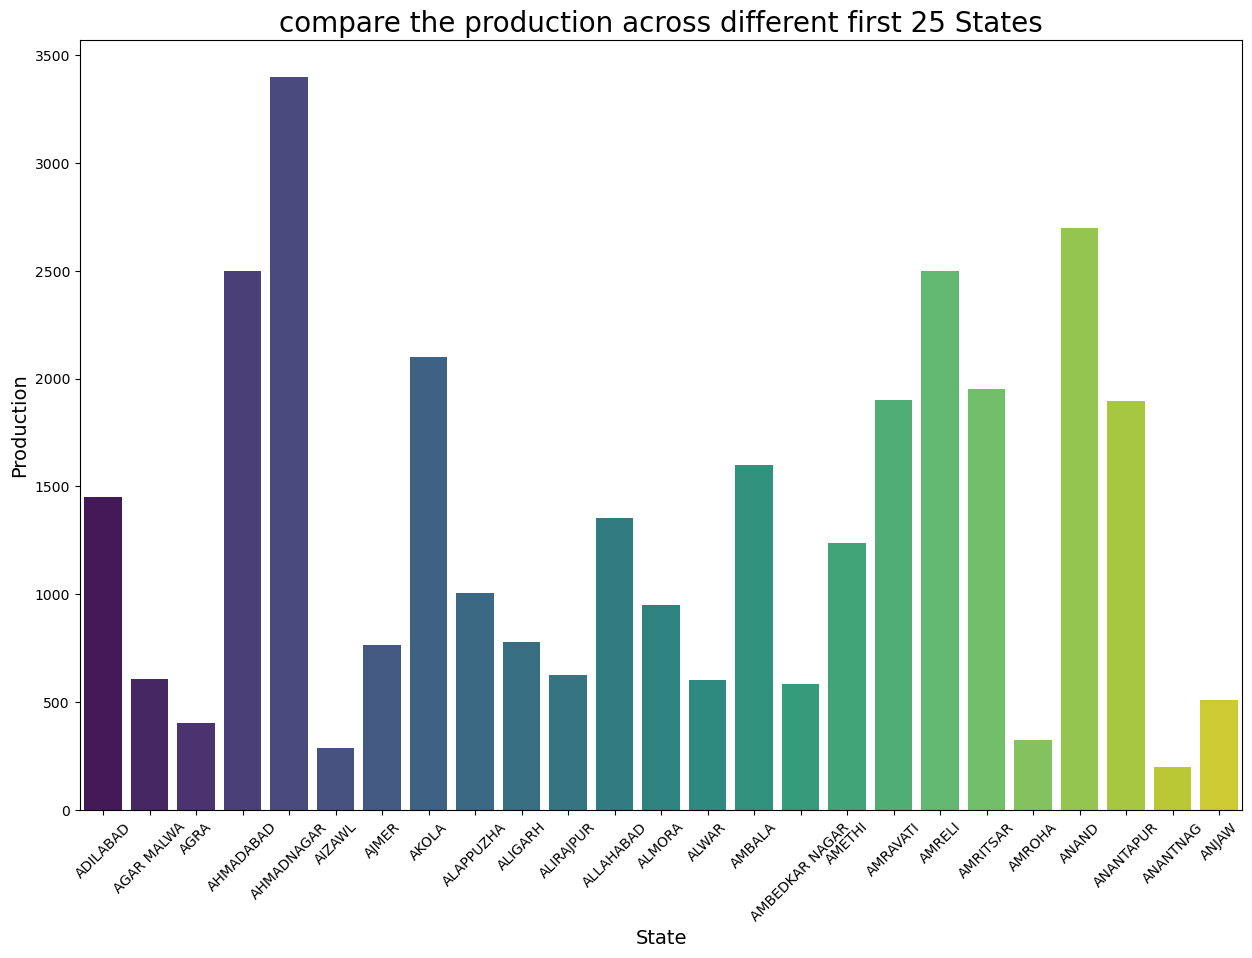

In [13]:
group_by_crop = df.groupby("District_Name")["Production"].median().reset_index().head(25)

plt.figure(figsize=(15, 10))
sns.barplot(x=group_by_crop["District_Name"], y=group_by_crop["Production"], palette='viridis')
plt.title("compare the production across different first 25 States", fontsize=20)
plt.xlabel("State",  fontsize=14)
plt.ylabel("Production",  fontsize=14)
plt.xticks(rotation=45) 
plt.show()

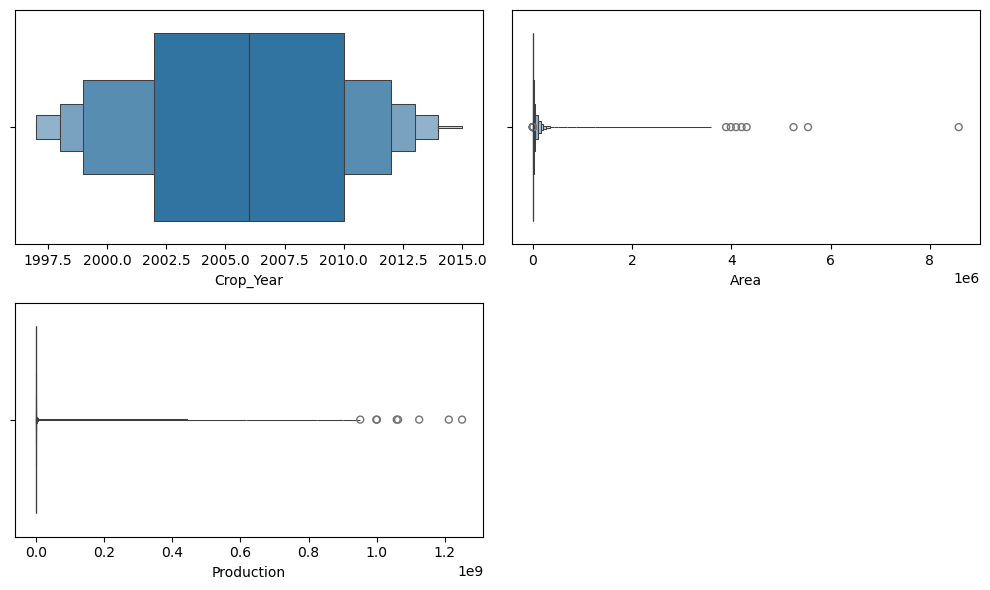

In [14]:
plt.figure(figsize=(10, 6))
for i, feature in enumerate(df.select_dtypes(include="number").columns):
    plt.subplot(2, 2, i+1)
    sns.boxenplot(data=df, x=feature)
plt.tight_layout()

# Encoding

In [15]:
encoder = LabelEncoder()

df["State_Name"] = encoder.fit_transform(df["State_Name"])
df["District_Name"] = encoder.fit_transform(df["District_Name"])
df["Season"] = encoder.fit_transform(df["Season"])
df["Crop"] = encoder.fit_transform(df["Crop"])

In [24]:
df["Area"].unique().max()

8580100.0

# Correlation

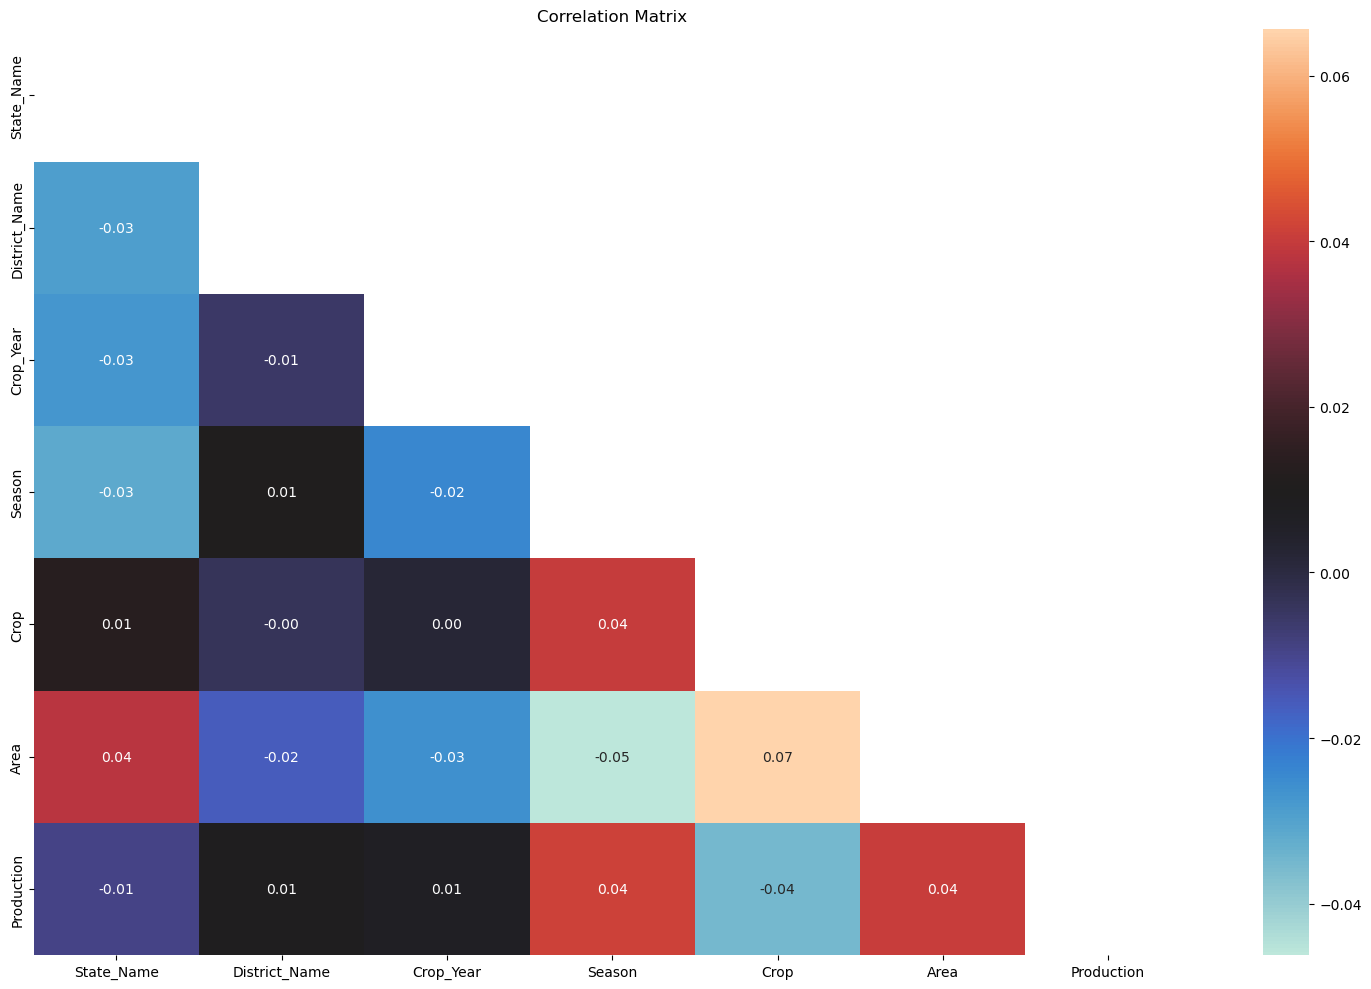

In [136]:
corr = df.corr()
mask_ut = np.triu(np.ones(corr.shape)).astype(np.bool_)

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="icefire", mask=mask_ut)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [137]:
def distance(data, label = ''):
    corr = data.corr(method = 'spearman')
    dist_linkage = linkage(squareform(1 - abs(corr)), 'complete')
    
    plt.figure(figsize = (10, 8), dpi = 300)
    dendro = dendrogram(dist_linkage, labels=data.columns, leaf_rotation=90)
    plt.title(f'Feature Distance in {label} Dataset', weight = 'bold', size = 20)
    plt.show()

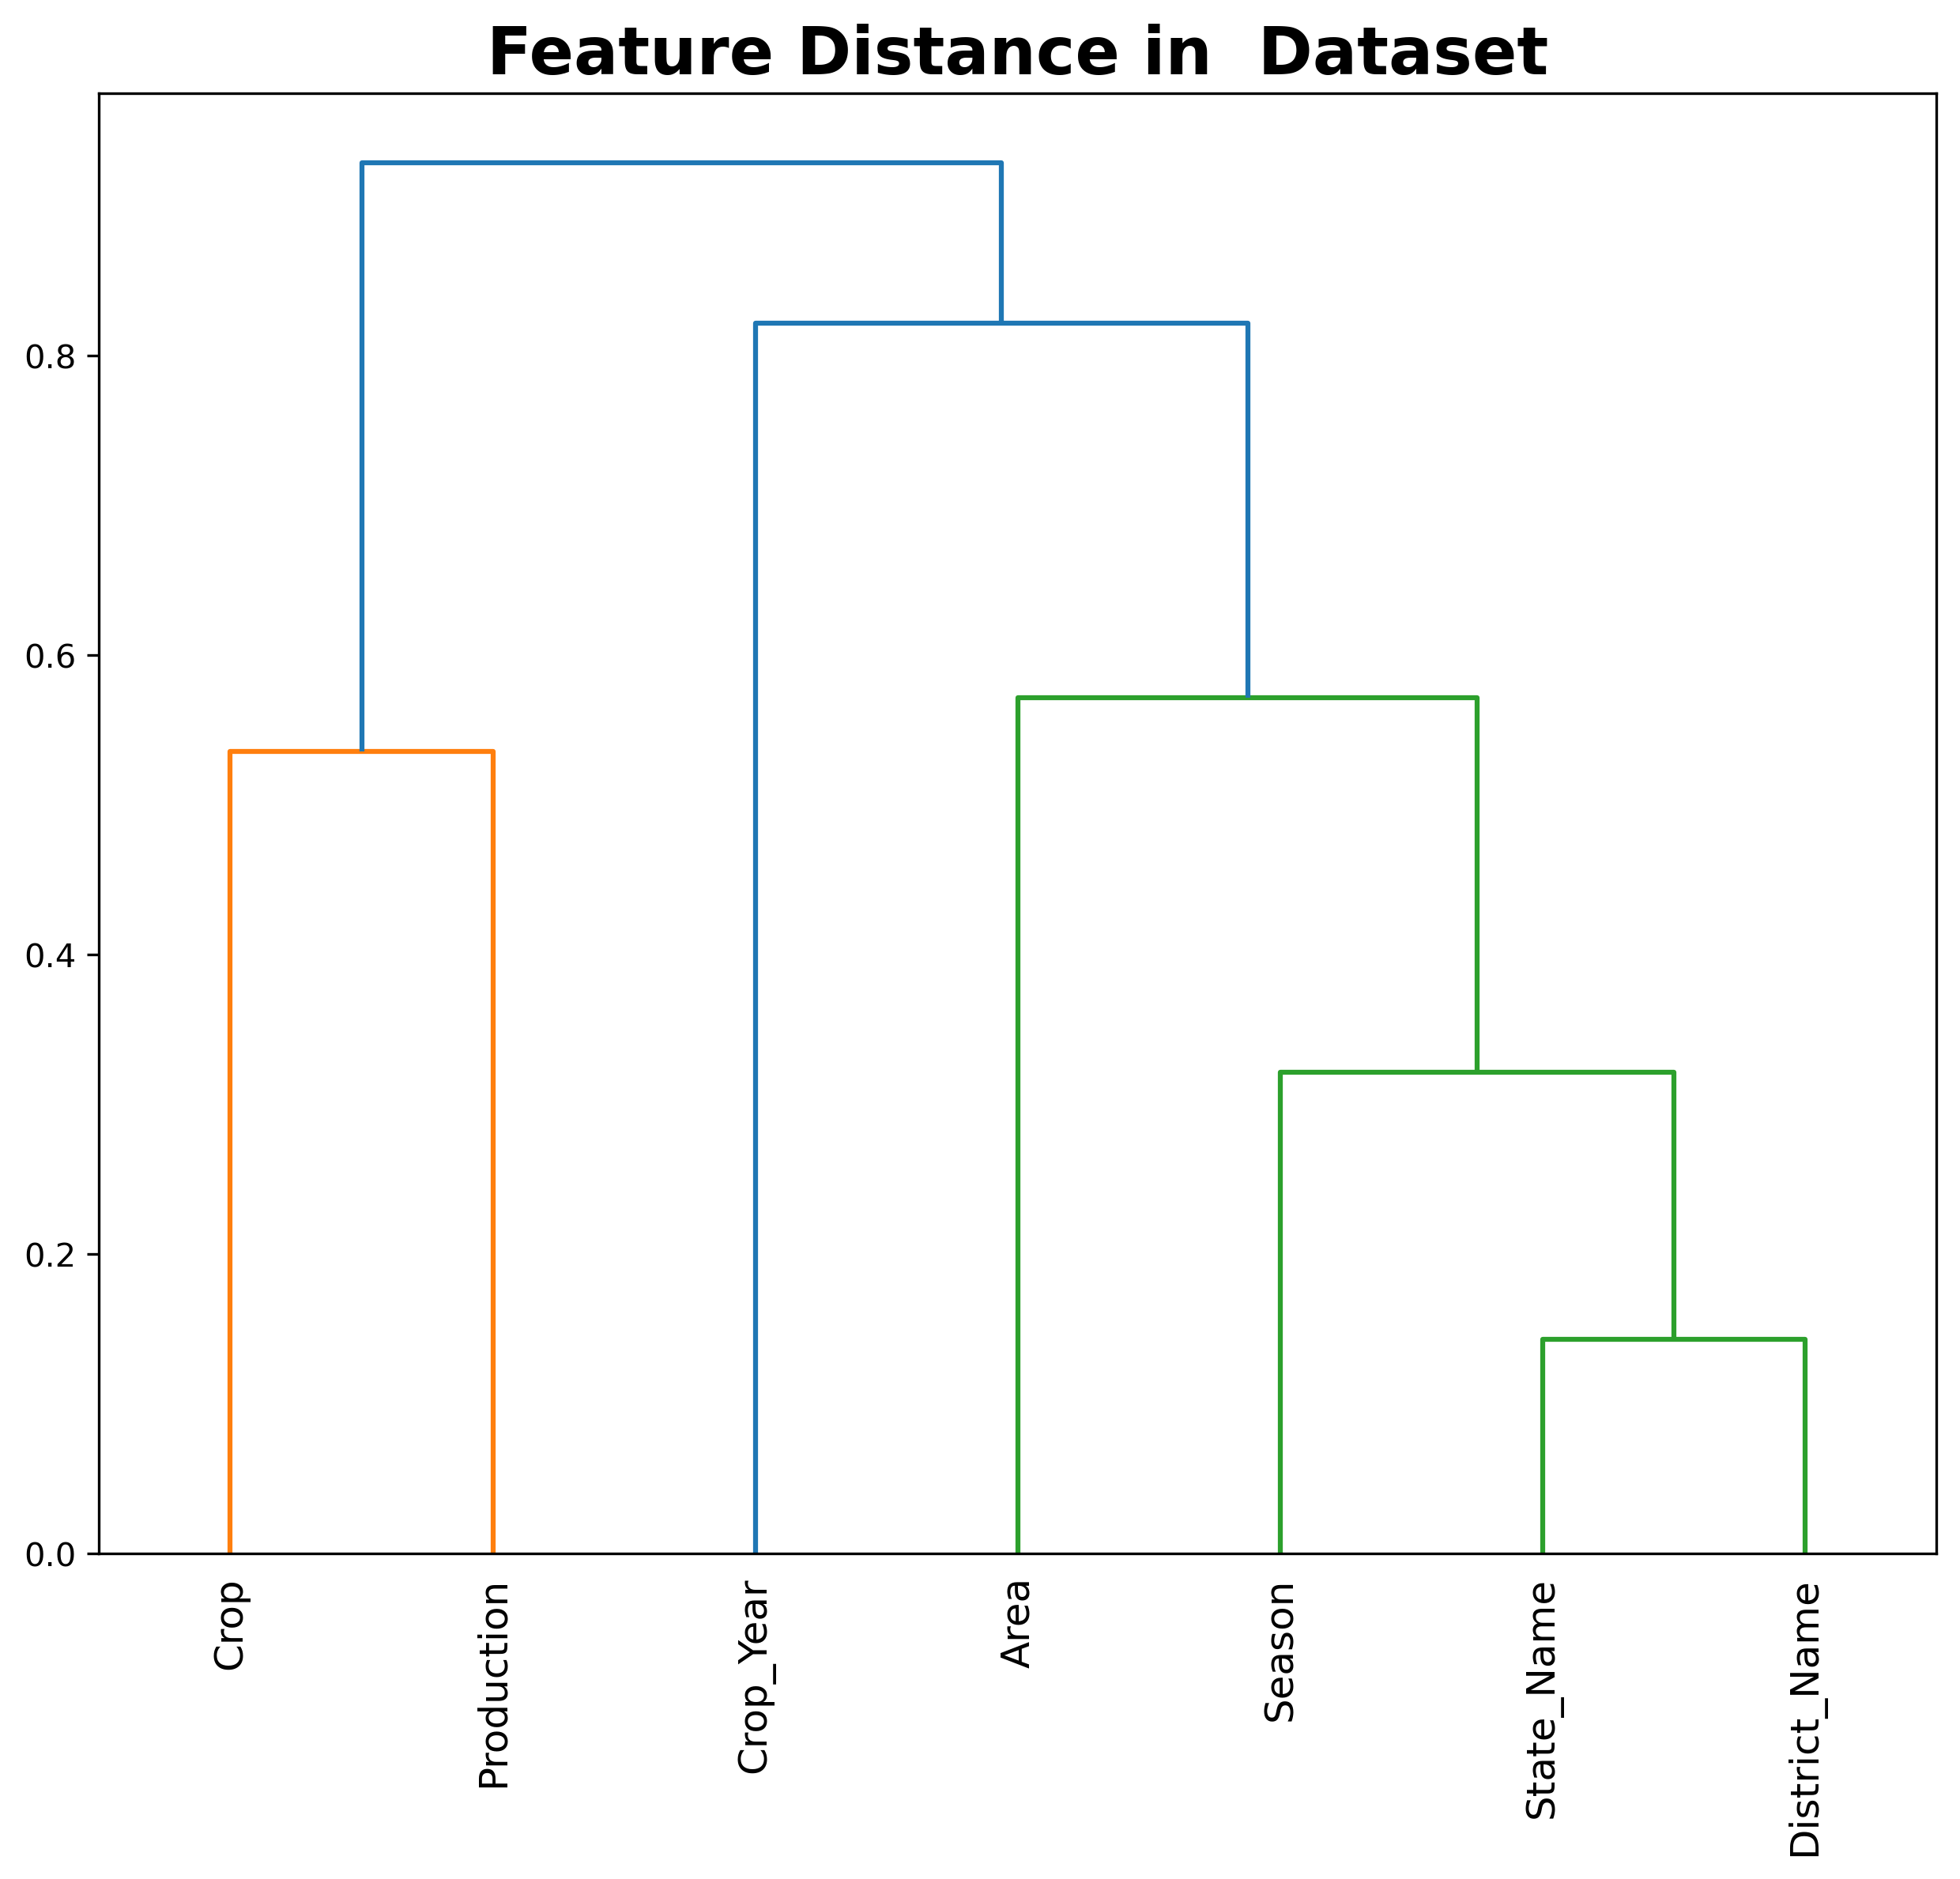

In [138]:
distance(corr)

# Missing Values Treatment

In [139]:
df.dropna(inplace=True)

# Outliers Treatment

In [140]:
q1 = df["Area"].quantile(0.25)
q3 = df["Area"].quantile(0.75)
iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df = df.loc[(df["Area"] > lower_limit) & (df["Area"] < upper_limit)]

# Train Test Split

In [141]:
X = df.drop("Production", axis=1)
y = df["Production"]

In [142]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((161944, 6), (161944,), (40486, 6), (40486,))

# Model Bulding

In [143]:
param = {
    'n_estimators': 300,
    'learning_rate': 0.1,
    'max_depth': 7,
    'subsample': 1.0,
    'colsample_bytree': 1.0,
    'gamma': 0
}

reg = XGBRegressor(random_state=42, **param)

In [144]:
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.2],
# }

# grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# grid_search.fit(x_train, y_train)

# print("Best Parameters:", grid_search.best_params_)

# best_model = grid_search.best_estimator_

reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

# Evaluation

In [145]:
y_pred = reg.predict(x_test)

In [146]:
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("R2-score: ", f"{(r2_score(y_test, y_pred) * 100):0.1f}", "%")

MAE:  18423.1475795958
MSE:  152413799737.584
R2-score:  91.8 %


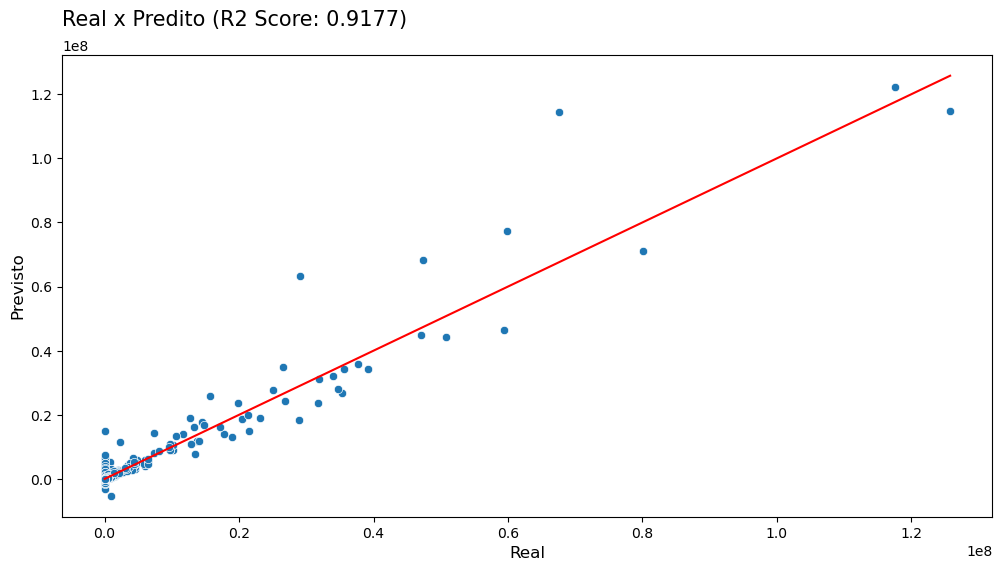

In [147]:
fig, ax = plt.subplots(figsize = (12, 6))

y_test = y_test.flatten() if hasattr(y_test, "flatten") else y_test
y_pred = y_pred.flatten() if hasattr(y_pred, "flatten") else y_pred

sns.scatterplot(x = y_test, y = y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')
ax.set_title(f"Real x Predito (R2 Score: {r2_score(y_test, y_pred):.4f})", fontsize = 15, pad = 10, loc = 'left')
ax.set_xlabel("Real", fontsize=12)
ax.set_ylabel("Previsto", fontsize=12)
plt.show()

# Save our Model

In [ ]:
import pickle

with open("crop_production_prediction_model.pkl", "wb") as file:
    pickle.dump(reg, file)